# Genetic Algorithm Workshop

In this workshop we will code up a genetic algorithm for a simple mathematical optimization problem.

Genetic Algorithm is a
* Meta-heuristic
* Inspired by Natural Selection
* Traditionally works on binary data. Can be adopted for other data types as well.

You can find an example illustrating GA below
![](https://github.com/timm/sbse14/wiki/etc/img/ga.jpg)

In [3]:
%matplotlib inline
# All the imports
from __future__ import print_function, division
from math import *
import random
import sys
import matplotlib.pyplot as plt

# TODO 1: Enter your unity ID here 
__author__ = "adhuri"

class O:
    """
    Basic Class which
        - Helps dynamic updates
        - Pretty Prints
    """
    def __init__(self, **kwargs):
        self.has().update(**kwargs)
    def has(self):
        return self.__dict__
    def update(self, **kwargs):
        self.has().update(kwargs)
        return self
    def __repr__(self):
        show = [':%s %s' % (k, self.has()[k]) 
                for k in sorted(self.has().keys()) 
                if k[0] is not "_"]
        txt = ' '.join(show)
        if len(txt) > 60:
            show = map(lambda x: '\t' + x + '\n', show)
        return '{' + ' '.join(show) + '}'
    
print("Unity ID: ", __author__)

Unity ID:  adhuri


### The optimization problem
The problem we are considering is a mathematical one 
<img src="cone.png" width=500px/>

**Decisions**: *r* in [0, 10] cm; *h* in [0, 20] cm

**Objectives**: minimize *S*, *T*

**Constraints**: *V* > 200cm<sup>3</sup>

In [29]:
# Few Utility functions
def say(*lst):
    """
    Print whithout going to new line
    """
    print(*lst, end="")
    sys.stdout.flush()

def random_value(low, high, decimals=2):
    """
    Generate a random number between low and high. 
    decimals incidicate number of decimal places
    """
    return round(random.uniform(low, high),decimals)

def gt(a, b): return a > b

def lt(a, b): return a < b

def shuffle(lst):
    """
    Shuffle a list
    """
    random.shuffle(lst)
    return lst

class Decision(O):
    """
    Class indicating Decision of a problem
    """
    def __init__(self, name, low, high):
        """
        @param name: Name of the decision
        @param low: minimum value
        @param high: maximum value
        """
        O.__init__(self, name=name, low=low, high=high)
        
class Objective(O):
    """
    Class indicating Objective of a problem
    """
    def __init__(self, name, do_minimize=True):
        """
        @param name: Name of the objective
        @param do_minimize: Flag indicating if objective has to be minimized or maximized
        """
        O.__init__(self, name=name, do_minimize=do_minimize)

class Point(O):
    """
    Represents a member of the population
    """
    def __init__(self, decisions):
        O.__init__(self)
        self.decisions = decisions
        self.objectives = None
        
    def __hash__(self):
        return hash(tuple(self.decisions))
    
    def __eq__(self, other):
        return self.decisions == other.decisions
    
    def clone(self):
        new = Point(self.decisions)
        new.objectives = self.objectives
        return new

class Problem(O):
    """
    Class representing the cone problem.
    """
    def __init__(self):
        O.__init__(self)
        # TODO 2: Code up decisions and objectives below for the problem
        # using the auxilary classes provided above.
        self.decisions = [Decision("radius",0,10),Decision("height",0,20)]
        self.objectives = [Objective("S"),Objective("T")]
        
    @staticmethod
    def evaluate(point):
        [r, h] = point.decisions
        s = (r ** 2 + h ** 2)** 0.5
        S = pi * r * s
        T = pi * r ** 2 + S
        point.objectives = [S,T]
        # TODO 3: Evaluate the objectives S and T for the point.
        return point.objectives
    
    @staticmethod
    def is_valid(point):
        v_restrictions=200
        [r, h] = point.decisions
        # TODO 4: Check if the point has valid decisions
        ##Based on the Volume restrictions
        
        V= pi * r * r * h / 3 
        if (V > v_restrictions ):
            return True
    
    def generate_one(self):
        # TODO 5: Generate a valid instance of Point.
        ## Generate point with number of decisions mentioned in Problem class
        while True:
            p=Point([random_value(d.low,d.high) 
                       for d in self.decisions ])
            if(self.is_valid(p)):
                self.evaluate(p)
                return p
    
cone = Problem()
print (cone.generate_one())
#print Problem.evaluate(p)

{	:decisions [8.65, 9.24]
 	:objectives [343.95162972428113, 579.0134460475034]
}


Great. Now that the class and its basic methods is defined, we move on to code up the GA.
### Population
First up is to create an initial population. 

In [5]:
def populate(problem, size):
    
    # TODO 6: Create a list of points of length 'size'
    return [
        problem.generate_one() 
        for _ in xrange(size)
    ]

print (populate(cone,4))
        

[{:decisions [6.14, 5.7] :objectives None}, {:decisions [8.8, 13.76] :objectives None}, {:decisions [7.01, 13.38] :objectives None}, {:decisions [9.16, 15.83] :objectives None}]


### Crossover
We perform a single point crossover between two points

In [6]:
def crossover(mom, dad):
    # TODO 7: Create a new point which contains decisions from 
    # the first half of mom and second half of dad
    n=len(mom.decisions)   
    return Point( mom.decisions[ :n//2] + dad.decisions[n//2: ] )

p,q = populate(cone,2)
print  (p ,q )
print (crossover(p,q) )

{:decisions [8.09, 15.19] :objectives None} {:decisions [8.11, 11.56] :objectives None}
{:decisions [8.09, 11.56] :objectives None}


### Mutation
Randomly change a decision such that 

In [30]:
def mutate(problem, point, mutation_rate=0.01):
    # TODO 8: Iterate through all the decisions in the point
    # and if the probability is less than mutation rate
    # change the decision(randomly set it between its max and min).
    #print (point)
    for  index,d in enumerate(problem.decisions):
        if lt( random_value(0,1) , mutation_rate):
            point.decisions[index] = random_value(d.low,d.high)
    return point

print (mutate(cone,p,0.1))

s=populate(cone,4)
print (s)

{:decisions [8.09, 15.19] :objectives None}
[{	:decisions [3.85, 19.5]
 	:objectives [240.40804816644058, 286.9743052742753]
}, {	:decisions [4.63, 14.64]
 	:objectives [223.34277706253314, 290.68878461827217]
}, {	:decisions [7.05, 15.11]
 	:objectives [369.29445905095304, 525.4394679159998]
}, {	:decisions [6.57, 11.19]
 	:objectives [267.83158070635653, 403.4381134392946]
}]


### Fitness Evaluation
To evaluate fitness between points we use binary domination. Binary Domination is defined as follows:
* Consider two points one and two.
* For every decision **o** and **t** in **one** and **two**, **o** <= **t**
* Atleast one decision **o** and **t** in **one** and **two**, **o** == **t**

**Note**: Binary Domination is not the best method to evaluate fitness but due to its simplicity we choose to use it for this workshop.


In [45]:
def bdom(problem, one, two):
    """
    Return if one dominates two
    """
    
    # Edge case - same point evaluation
    if ( one == two):
        return False
    
    objs_one = problem.evaluate(one)
    objs_two = problem.evaluate(two)
    
    #print (one,two)
    
    dominates = False
    # TODO 9: Return True/False based on the definition
    # of bdom above.
    flag1 = True  # For first condition
    flag2 = False  # For second condition
    
    for  index,_ in enumerate(problem.objectives):
            #print (one.objectives[index] , two.objectives[index])
            if ((flag1 is True) & gt(one.objectives[index] , two.objectives[index])) :
                flag1=False
            elif (not flag2 & (one.objectives[index] is not two.objectives[index]) ):
                flag2= True
    
    dominates = flag1 & flag2
    return dominates         

print (bdom(cone,s[3],s[3]))



False


### Fitness and Elitism

In this workshop we will count the number of points of the population P dominated by a point A as the fitness of point A. This is a very naive measure of fitness since we are using binary domination. 

Few prominent alternate methods are
1. [Continuous Domination](http://www.tik.ee.ethz.ch/sop/publicationListFiles/zk2004a.pdf) - Section 3.1
2. [Non-dominated Sort](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=996017)
3. [Non-dominated Sort + Niching](http://www.egr.msu.edu/~kdeb/papers/k2012009.pdf)

**Elitism**: Sort points with respect to the fitness and select the top points.

In [48]:
def fitness(problem, population, point):
    dominates = 0
    # TODO 10: Evaluate fitness of a point.
    # For this workshop define fitness of a point 
    # as the number of points dominated by it.
    # For example point dominates 5 members of population,
    # then fitness of point is 5.
    
    for p in population:
        if bdom(problem,point,p):
            dominates += 1 
    return dominates

def elitism(problem, population, retain_size):
    # TODO 11: Sort the population with respect to the fitness
    # of the points and return the top 'retain_size' points of the population
    
    fitlist=[fitness(cone,population,p) for p in population] # Creating list based on fitness
    population = [p for (_,p) in sorted(zip(fitlist,population), reverse=True)] # Using sorted and zip technique from stackoverflow
    
    return population[:retain_size]

population=populate(cone,10)

for p in population:
    print (p,fitness(cone,population,p))
    
print ( elitism(cone,population,7) )



{	:decisions [8.68, 15.53]
 	:objectives [485.1459836220105, 721.8411139658341]
} 1
{	:decisions [9.15, 5.75]
 	:objectives [310.64509405880335, 573.6670849989748]
} 2
{	:decisions [4.77, 16.11]
 	:objectives [251.7747378162304, 323.2550813040936]
} 8
{	:decisions [9.41, 18.29]
 	:objectives [608.0604275691749, 886.2424880185092]
} 0
{	:decisions [4.03, 19.7]
 	:objectives [254.5794741467635, 305.60176627445]
} 7
{	:decisions [5.51, 13.57]
 	:objectives [253.5246439436597, 348.9037110659112]
} 7
{	:decisions [6.22, 12.35]
 	:objectives [270.206990368338, 391.75018358748133]
} 6
{	:decisions [6.4, 19.08]
 	:objectives [404.6325255665531, 533.312160657591]
} 2
{	:decisions [6.09, 19.23]
 	:objectives [385.92318507704306, 502.43888757264665]
} 3
{	:decisions [6.57, 13.22]
 	:objectives [304.70321724960365, 440.3097499825417]
} 5
[{	:decisions [4.77, 16.11]
 	:objectives [251.7747378162304, 323.2550813040936]
}, {	:decisions [5.51, 13.57]
 	:objectives [253.5246439436597, 348.9037110659112

### Putting it all together and making the GA

In [64]:
def ga(pop_size = 100, gens = 250):
    problem = Problem()
    population = populate(problem, pop_size)
    [problem.evaluate(point) for point in population]
    initial_population = [point.clone() for point in population]
    gen = 0 
    while gen < gens:
        say(".")
        children = []
        for _ in range(pop_size):
            mom = random.choice(population)
            dad = random.choice(population)
            while (mom == dad):
                dad = random.choice(population)
            child = mutate(problem, crossover(mom, dad))
            if problem.is_valid(child) and child not in population+children:
                children.append(child)
        population += children
        population = elitism(problem, population, pop_size)
        gen += 1
    print("")
    return initial_population, population

### Visualize
Lets plot the initial population with respect to the final frontier.

In [65]:
def plot_pareto(initial, final):
    initial_objs = [point.objectives for point in initial]
    final_objs = [point.objectives for point in final]
    initial_x = [i[0] for i in initial_objs]
    initial_y = [i[1] for i in initial_objs]
    final_x = [i[0] for i in final_objs]
    final_y = [i[1] for i in final_objs]
    plt.scatter(initial_x, initial_y, color='b', marker='+', label='initial')
    plt.scatter(final_x, final_y, color='r', marker='o', label='final')
    plt.text(4, 0, 'Workshop - adhuri ', fontsize=10 ,color ='g')
    plt.title("Scatter Plot between initial and final population of GA")
    plt.ylabel("Total Surface Area(T)")
    plt.xlabel("Curved Surface Area(S)")
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.175), ncol=2)
    plt.show()
    

..........................................................................................................................................................................................................................................................


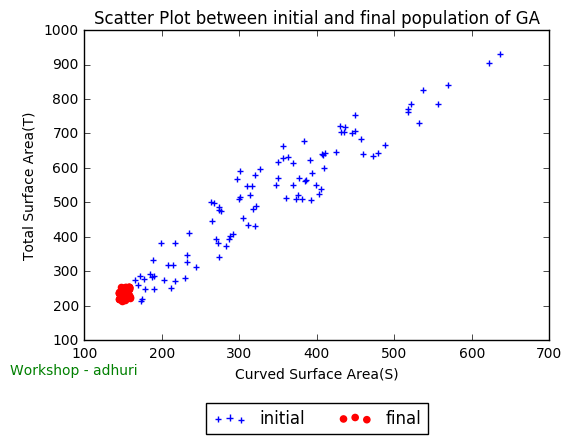

In [66]:
initial, final = ga()
plot_pareto(initial, final)

Here is a sample output
<img src="sample.png" width=300/>